# Trabajo de Mentoria - DiploDatos

**Grupo A**
    
Integrantes: 
    <li> Bruno Garcia
    <li> Nicolas Chiapello
    <li> Martin Peñas
    <li> Pame Pairo

## Vectorización: CountVectorizer

En esta notebook usaremos CountVectorizer, el cual describe la ocurrencia de palabras dentro de los textos que conforman un corpus. Da un resultado de 1 o más si la palabra está presente una o más veces en el texto y 0 si no está presente. Por lo tanto, a partir de las palabras del corpus, crea una vector / bolsa de palabras para cada texto que indica la frecuencia de estas en dicho documento, esto para cada texto que conforma el corpus.

In [29]:
import pandas as pd 

df_news= pd.read_csv("https://raw.githubusercontent.com/Mentoria-Financiera-DiploDatos/Entrega3/master/sentimientos/data/feeling_procesado.csv")
df_news.head(3)

,Unnamed: 0,feeling,news,news_tokens,news_tokens_tagged
0,0,neutral,"According to Gran , the company has no plans t...","['accord', 'gran', 'company', 'plan', 'move', ...","[('accord', 'NN'), ('gran', 'VBD'), ('company'..."
1,1,neutral,Technopolis plans to develop in stages an area...,"['technopolis', 'plan', 'develop', 'stage', 'a...","[('technopolis', 'NN'), ('plan', 'NN'), ('deve..."
2,2,negative,The international electronic industry company ...,"['international', 'electronic', 'industry', 'c...","[('international', 'JJ'), ('electronic', 'JJ')..."


## *Aprendizaje Automático*

#### Train/Test Split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(df_news.news_tokens, df_news.feeling, test_size=0.2, random_state=42)

In [31]:
#Realizamos el CV con los textos preprocesados para train y test por separado.
cv = CountVectorizer(lowercase=False)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [32]:
print(y_train[y_train == 'positive'].size/y_train.size)
print(y_train[y_train == 'neutral'].size/y_train.size)
print(y_train[y_train == 'negative'].size/y_train.size)
y_train.size

0.2813953488372093
0.5935400516795866
0.12506459948320414


3870

In [33]:
print(y_test[y_test == 'positive'].size/y_test.size)
print(y_test[y_test == 'neutral'].size/y_test.size)
print(y_test[y_test == 'negative'].size/y_test.size)
y_test.size

0.28202479338842973
0.59400826446281
0.12396694214876033


968

In [34]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [35]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

### **MultinomialNB**

Este es el primer algoritmo de clasificación que probamos, por eso estan desarrollado todos los pasos por sepadado y de forma más detallada, pero al obtener un modelo que no da muy buenos resultados seguimos probando otros algoritmos.

In [54]:
from sklearn.naive_bayes import MultinomialNB

multinomNB = MultinomialNB().fit(X_train, y_train)
multinomNB

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
multinomNB.classes_

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [56]:
multinomNB.class_count_

array([ 484., 2297., 1089.])

In [57]:
np.exp(multinomNB.class_log_prior_)

array([0.1250646 , 0.59354005, 0.28139535])

In [58]:
text = "Naive Bayes - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, multinomNB.predict(X_test)))

Naive Bayes - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.63      0.57      0.60       120
     neutral       0.77      0.83      0.80       575
    positive       0.60      0.52      0.56       273

    accuracy                           0.71       968
   macro avg       0.67      0.64      0.65       968
weighted avg       0.70      0.71      0.71       968



#### GridSearchCV

In [59]:
param_grid = {
    # 'alpha': [1.0, 0.5, 0.1, 0.01, 0.001],
    'fit_prior': [True, False],
    'class_prior': [None, [0.33, 0.34, 0.33], [0.13, 0.59, 0.28]]
}

multinomNB = MultinomialNB()
multinomNB_clf = GridSearchCV(multinomNB, param_grid, scoring='f1_macro', cv=3)
multinomNB_clf.fit(X_train, y_train);

In [60]:
best_multinomNB = multinomNB_clf.best_estimator_
best_multinomNB

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
print(classification_report(y_test, best_multinomNB.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.63      0.57      0.60       120
     neutral       0.77      0.83      0.80       575
    positive       0.60      0.52      0.56       273

    accuracy                           0.71       968
   macro avg       0.67      0.64      0.65       968
weighted avg       0.70      0.71      0.71       968



#### RandomizedSearchCV

In [62]:
param_grid = {
    'alpha': [1.0, 0.5, 0.1, 0.01, 0.001],
    'fit_prior': [1, 0],
    'class_prior': [None, [0.33, 0.34, 0.33], [0.13, 0.59, 0.28]]
}

multinomNB = MultinomialNB()
multinomNB_clf = RandomizedSearchCV(multinomNB, param_grid, n_iter=36, cv=10, random_state=0)
multinomNB_clf.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=36. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [63]:
best_multinomNB = multinomNB_clf.best_estimator_
best_multinomNB

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=1)

In [64]:
print(classification_report(y_test, best_multinomNB.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.63      0.57      0.60       120
     neutral       0.77      0.83      0.80       575
    positive       0.60      0.52      0.56       273

    accuracy                           0.71       968
   macro avg       0.67      0.64      0.65       968
weighted avg       0.70      0.71      0.71       968



### **Logistic Regresion**

In [36]:
from sklearn.linear_model import LogisticRegression

# Selección de parámetros
params = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    # 'C': [1,10,20]
}

Logreg = LogisticRegression()
Logreg_clf = GridSearchCV(Logreg, params, cv=3, scoring='f1_macro', n_jobs=-1)
Logreg_clf.fit(X_train, y_train)
best_Logreg = Logreg_clf.best_estimator_

Probamos también realizar la selección de las configuraciones que den el mejor modelo utilizando RandomizedSearchCV, pero al obtener iguales resultados que con GridSearchCV decidimos seguir utilizando este que era más sencillo.

In [37]:
# Logreg = LogisticRegression()
# Logreg_clf = RandomizedSearchCV(Logreg, params, n_iter=36, cv=3, random_state=0, n_jobs=-1)
# Logreg_clf.fit(X_train, y_train)
# best_Logreg = Logreg_clf.best_estimator_

In [38]:
print(best_Logreg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [39]:
text = "Regresión Logística - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_Logreg.predict(X_test)))

Regresión Logística - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.69      0.59      0.64       120
     neutral       0.80      0.87      0.83       575
    positive       0.69      0.61      0.65       273

    accuracy                           0.76       968
   macro avg       0.73      0.69      0.71       968
weighted avg       0.75      0.76      0.76       968



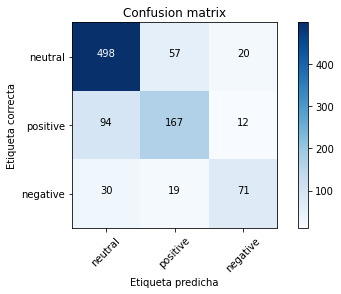

In [40]:
cm = confusion_matrix(y_test, best_Logreg.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **SVM**

In [41]:
from sklearn.svm import SVC

params = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["auto", "scale"],
    # "C": [1,10,20]
}

svm = SVC()
svm_clf = GridSearchCV(svm, params, cv=3, scoring='f1_macro', n_jobs=-1)
svm_clf.fit(X_train, y_train)
best_svm = svm_clf.best_estimator_

In [42]:
print(best_svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [43]:
text = "SVM - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_svm.predict(X_test)))

SVM - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.60      0.64      0.62       120
     neutral       0.81      0.82      0.81       575
    positive       0.65      0.61      0.63       273

    accuracy                           0.74       968
   macro avg       0.68      0.69      0.69       968
weighted avg       0.74      0.74      0.74       968



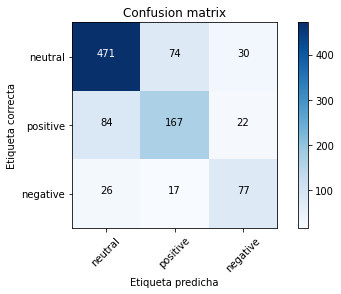

In [44]:
cm = confusion_matrix(y_test, best_svm.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **SGDClassifier**

In [50]:
from sklearn.linear_model import SGDClassifier

params = {
    'loss': ['hinge','log','squared_loss','epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'none'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1],
    'random_state': [42],
    'learning_rate': ['optimal','constant','invscaling'],
    'eta0': [0.0001, 0.001, 0.01, 0.1]
}

sgdlinear = SGDClassifier()
sgdlinear_clf = GridSearchCV(sgdlinear, params, cv=5, scoring='f1_macro', n_jobs=-1)
sgdlinear_clf.fit(X_train, y_train)
best_sgdlinear = sgdlinear_clf.best_estimator_

In [51]:
print(best_sgdlinear)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [52]:
text = "SGD Classifier - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_sgdlinear.predict(X_test)))

SGD Classifier - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.62      0.60      0.61       120
     neutral       0.80      0.84      0.82       575
    positive       0.68      0.63      0.65       273

    accuracy                           0.75       968
   macro avg       0.70      0.69      0.69       968
weighted avg       0.74      0.75      0.75       968



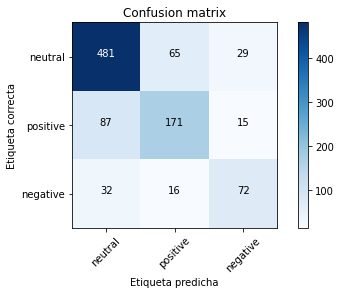

In [53]:
cm = confusion_matrix(y_test, best_sgdlinear.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **DecisionTreeClassifier**

In [65]:
from sklearn.tree import DecisionTreeClassifier

search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [3, 6, 10]
}

tree = DecisionTreeClassifier(random_state=42)
tree_clf = GridSearchCV(tree, search_params, cv=3, scoring='f1_macro', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree = tree_clf.best_estimator_

In [66]:
print(best_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [67]:
text = "Arboles de decisión - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_tree.predict(X_test)))

Arboles de decisión - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.69      0.28      0.40       120
     neutral       0.70      0.94      0.80       575
    positive       0.70      0.39      0.50       273

    accuracy                           0.70       968
   macro avg       0.70      0.54      0.57       968
weighted avg       0.70      0.70      0.67       968



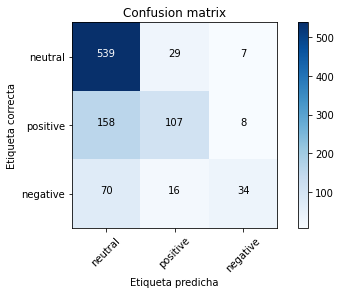

In [68]:
cm = confusion_matrix(y_test, best_tree.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Selección de parámetros
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [200, 300, 400], # En este caso mejora tocando este hiperparametro
    'max_features': ['sqrt', 'log2']
}

rforest = RandomForestClassifier()
rforest_clf = GridSearchCV(rforest, params, cv=3, scoring='f1_macro', n_jobs=-1)
rforest_clf.fit(X_train, y_train)

best_rforest = rforest_clf.best_estimator_

In [46]:
# rforest_clf = RandomizedSearchCV(rforest, params, n_iter=36, cv=10, random_state=0)
# rforest_clf.fit(X_train, y_train)

# best_rforest = rforest_clf.best_estimator_

In [47]:
print(best_rforest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=400, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [48]:
text = "Random Forest - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_rforest.predict(X_test)))

Random Forest - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.75      0.43      0.55       120
     neutral       0.76      0.91      0.83       575
    positive       0.70      0.55      0.61       273

    accuracy                           0.75       968
   macro avg       0.74      0.63      0.67       968
weighted avg       0.75      0.75      0.74       968



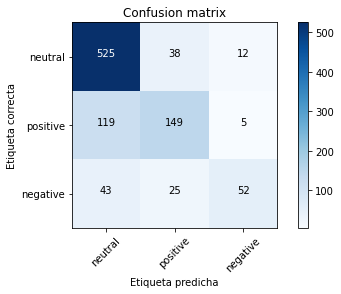

In [49]:
cm = confusion_matrix(y_test, best_rforest.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **KNeighborsClassifier**

In [69]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    "n_neighbors": [1,2,3,4,5,6,7,8,15,20],
    "weights": ["uniform", "distance"],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"]
}

knn = KNeighborsClassifier()
knn_clf= GridSearchCV(knn, params, cv=3, scoring='f1_macro', n_jobs=-1)
knn_clf.fit(X_train, y_train)

best_knn = knn_clf.best_estimator_

In [70]:
print(best_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [71]:
text = "KNN - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_knn.predict(X_test)))

KNN - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.33      0.33      0.33       120
     neutral       0.71      0.88      0.79       575
    positive       0.61      0.31      0.41       273

    accuracy                           0.65       968
   macro avg       0.55      0.51      0.51       968
weighted avg       0.64      0.65      0.62       968



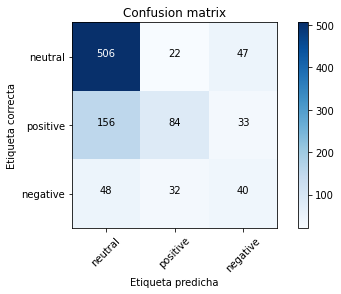

In [72]:
cm = confusion_matrix(y_test, best_knn.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### Conclusión

De todos los algoritmos de clasificación probados el mejor modelo con el que mejor resultados obtuvimos es de regresión logistica, con un accuracy del 76 y un f1_score del 71, siendo la medición máxima en ambas.